In [1]:
import numpy as np
import sympy as sp
from utils import simulate, phase_portrait, phase_graph
from matplotlib.pyplot import *
rc('text', usetex=True)
# TODO:
# CHeCK SIGNS IN ERRORS
from scipy.integrate import odeint

def simulate_controller(f, controller, init_state, t0=0, tf=1, N=2000, size=(6, 4), show_plot=False):
    t = np.linspace(t0, tf, N)  # Create time span
    dT = (tf - t0)/N
    x_sol = []
    u_sol = []
    for x_init in init_state:
        x0 = x_init
        u0 = np.array(controller(x0, 0))

        x_sol_i = np.zeros((N, len(x0)))
        u_sol_i = np.zeros((N, 1))

        for i in range(N):
            time = t[i]
            t_k = np.linspace(time, time+dT, 2)
            u = controller(x0, time)
            x_k = odeint(f, x0, t_k, args = (u,))
            x0 = x_k[-1]
            x_sol_i[i,:] = x0
            u_sol_i[i,:] = u

        x_sol.append(x_sol_i)
        u_sol.append(u_sol_i)

    return x_sol, u_sol, t



## **Fundamentals of Robot Control:**
### **Lecture 7: Parametric Uncertainty and Adaptive Control**

### **Why Adaptive Control**

In some control tasks, such as those in robot manipulation, the systems to be
controlled have parameter uncertainty at the beginning of the control operation. 
It may be the case that slowly changing parameters drift out from the known region used to design robust controller. 
Unless such parameter uncertainty is gradually reduced on-line by an adaptation or estimation
mechanism, it may cause inaccuracy or instability for the control systems.

An adaptive controller differs from an ordinary controller in that the controller
parameters are variable, and there is a mechanism for adjusting these parameters on-
line based on signals in the system.

Examples are:
* **Robot manipulation**: Robots have to manipulate loads of various sizes, weights,
and mass distributions. It is very restrictive to assume that the inertial
parameters of the loads are well known before a robot picks them up and moves
them away.

* **Ship steering**: On long courses, ships are usually put under automatic steering.
However, the dynamic characteristics of a ship strongly depend on many uncertain
parameters, such as water depth, ship loading, and wind and wave conditions. 

* **Aircraft control**: The dynamic behavior of an aircraft depends on its altitude,
speed, and configuration. The ratio of variations of some parameters can lie
between 10 to 50 in a given flight. 

* **Process control**: Models for metallurgical and chemical processes are usually
complex and also hard to obtain. The parameters characterizing the processes vary
from batch to batch. Furthermore, the working conditions are usually time-varying.


### **Structure of Adaptive Controllers:**

The controller is usually parameterized by a number of adjustable parameters
(implying that one may obtain a family of controllers by assigning various values to
the adjustable parameters). The controller should have perfect tracking capacity in
order to allow the possibility of tracking convergence. When the plant parameters
are not known, the adaptation mechanism will adjust the controller parameters so that
perfect tracking is asymptotically achieved. If the control law is linear in terms of the
adjustable parameters, it is said to be linearly parameterized. Existing adaptive
control designs normally require linear parametrization of the controller in order to
obtain adaptation mechanisms with guaranteed stability and tracking convergence.

The design of an adaptive controller usually involves the following three steps:
* choose a control law containing variable parameters
* choose an adaptation law for adjusting those parameters
* analyze the convergence properties of the resulting control system




### **Scheme of Adaptive Control**:

<p align="center">
<img src="https://drive.google.com/uc?id=1TWuNfvGW2sOKzS5FEZ9u49Wn7N4hIu9s" alt="drawing" width="50%" style="margin:auto"/>
</p>

### **Adaptive Control of First-Order Systems**

Let us consider a first order system which can be written in following form:
$$
\dot{x} = f(x)  + \boldsymbol{\phi}(x) \mathbf{p}  + u
$$ 
where $\mathbf{p}$ are unknown constant or slowly varying parameters.

We are looking for control that can drive this system to the desired trajectory $x$ such that $\tilde{x}(t) = x_d(t) - x(t) \rightarrow 0$ as $t\rightarrow \infty$

<!-- On top of this we want to somehow use a basic idea of the adaptive control, so we want to find adaptation law $\hat{p}(x)$ and control law $u(x,\hat{p})$ such that control error $\tilde{x}$ will gradually decrease together with parametric unceranty $\tilde{p} = \hat{p} - p$.  -->


Let us define following Lyapunov candidate: 
$$
V(\tilde{x},\tilde{\mathbf{p}}) = \frac{1}{2}\tilde{x}^2 + \frac{1}{2}\gamma\tilde{\mathbf{p}}^T\tilde{\mathbf{p}}
$$ 
Derevitive of candidate function is given by:
$$
\dot{V} = \tilde{x}\dot{\tilde{x}} + \gamma\tilde{\mathbf{p}}^T \dot{\tilde{\mathbf{p}}}
$$ 

where $\tilde{\mathbf{p}} = \hat{\mathbf{p}} - \mathbf{p}$


Taking in to account that $\dot{\tilde{x}} = \dot{x}_d - \dot{x}$ one can rewrite above as:
$$
\dot{V} = \tilde{x}(\dot{x}_d -   f(x)  - \boldsymbol{\phi}(x) \mathbf{p}  - u) + \gamma\tilde{\mathbf{p}}^T \dot{\tilde{\mathbf{p}}}
$$ 


The best control law based on known parameter estimates is:
$$
u = \dot{x}_d-f(x)  - \boldsymbol{\phi}(x) \mathbf{\hat{p}} + k\tilde{x}
$$ 
Results in following derevitive of Lypunov candidate:
$$
\dot{V} = -\tilde{x}(\boldsymbol{\phi}(x) \tilde{\mathbf{p}} + k\tilde{x}) + \gamma\tilde{\mathbf{p}}^T \dot{\tilde{\mathbf{p}}}
$$ 

How we can ensure that expression above is negative semi definite?


To do so we rearrange terms to get:
$$
V=-k\tilde{x}^2 +(\gamma \dot{\tilde{\mathbf{p}}} + \boldsymbol{\phi}^T(x)\tilde{x})\tilde{\mathbf{p}} 
$$


The first part is negative on it's own, and the latter is vanishing as soon as:
$$
\gamma \dot{\tilde{\mathbf{p}}} + \boldsymbol{\phi}^T(x)\tilde{x} = 0
$$

Thus assuming that $\mathbf{p}$ are constant:
$$
\dot{\tilde{\mathbf{p}}} =  \dot{\mathbf{\hat{p}}}-\dot{\mathbf{p}} =  \dot{\mathbf{\hat{p}}} = -\frac{1}{\gamma} \boldsymbol{\phi}^T(x)\tilde{x}
$$ 


Substitution of adaptation law to $\dot{V}$ yields:
$$
\dot{V} = -k\tilde{x}^2
$$
Thus tracking error assymptotically converges to zero. Note that this control is smooth in continues in contrast to sliding mode driven robust controller, however we prove convergence of $\tilde{x}$ but not of $\tilde{\mathbf{p}}$!

Let's us consider the following example:
$$
    \dot{x} = \sin x  - ax + bx^2 + u  
$$
where $a$ and $b$ are unknown coefficients.


In [2]:
def f(x):
    return np.sin(x)

def phi(x):
    return np.array([-x, x**2])

We difine the desired trajectory as $x_d = \cos t$:

In [3]:
def trajectory(t):
    x_d = np.cos(t)
    dx_d = -np.sin(t)
    return x_d, dx_d

Let us devine the controller:

In [4]:
a = 2
b = 1.5
p = np.array([a, b])

gamma = 0.5
k = 2

def control(x, desired, p_hat):
    x_d, dx_d = desired
    # x_d, dx_d = 1, 0
    x_e = x_d - x
    # controller
    u = dx_d - f(x) - phi(x) @ p_hat + k*x_e

    # adaptation law
    dp_hat = -phi(x).T*x_e/gamma
    return u, dp_hat

And simulate the response

In [5]:

# note that we include the parameter estimates in to state in order to integrate
def closed_loop_dynamics(state, t):
    x, p_hat = state[0], state[1:]

    desired = trajectory(t)
    u, dp_hat = control(x, desired, p_hat)

    dx = f(x) + phi(x) @ p + u 

    return np.concatenate(([dx], dp_hat))

tf = 30
x_sol = simulate(closed_loop_dynamics, [[0, 0, 0]], tf=tf)

y = x_sol[0][:,0]
a_hat = x_sol[0][:,1]
b_hat = x_sol[0][:,2]
t= np.linspace(0, tf, len(y))              
y_d, dy_d = trajectory(t)

<Figure size 600x400 with 0 Axes>

The response is given on figure below:

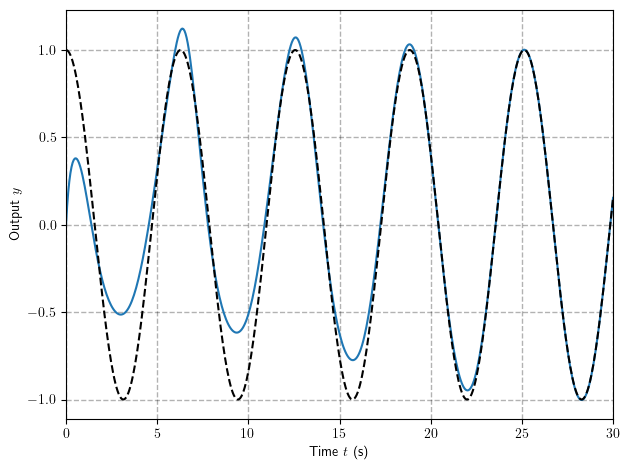

In [6]:
plot(t, y)    
plot(t, y_d,color = 'black', linestyle='--' )
xlim([t[0],t[-1]])
ylabel(r'Output $y$')    
xlabel(r'Time $t$ (s)')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()


Let's check the parameters adaptation:

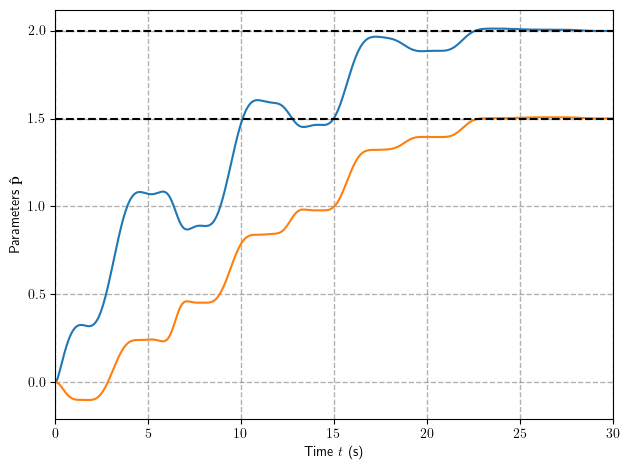

In [7]:

plot(t, a_hat)    
plot(t, b_hat)
plot([b]*len(t) ,color = 'black', linestyle='--' )
plot([a]*len(t) ,color = 'black', linestyle='--' )
xlim([t[0],t[-1]])
ylabel(r'Parameters $\mathbf{\hat{p}}$')    
xlabel(r'Time $t$ (s)')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()

### **Phase Space Interpretation**

Let us now analyze the of closed loop system of parameters/state errors for the case where there is one uncertaint parameter:
$$
\begin{cases}
\dot{\tilde{x}}   = - \phi(\tilde{x}, t) \tilde{p} - k\tilde{x}\\
 \dot{\tilde{p}} = \frac{1}{\gamma} \phi(\tilde{x}, t)\tilde{x}
\end{cases}
$$

In [8]:
k = 1 
gamma = 1.0

def phi(x):
    return np.sin(x)**2

def adaptive_error_dynamics(state, t):
    x_d = 0
    x_e, p_e = state
    x = x_d - x_e

    dx_e = - phi(x)*p_e - k*x_e
    dp_e =  phi(x)*x_e/gamma
    return dx_e, dp_e


The phase portrait indicate convergence of tracking error but not parameters:

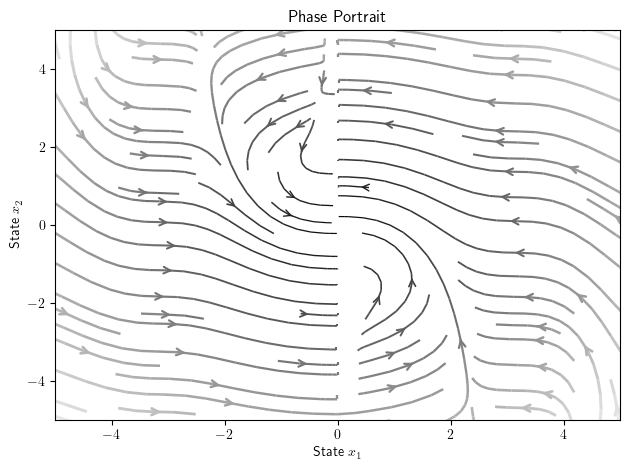

In [9]:
phase_portrait(adaptive_error_dynamics,x_range=[5, 5])

Which is clear from temporal plot:

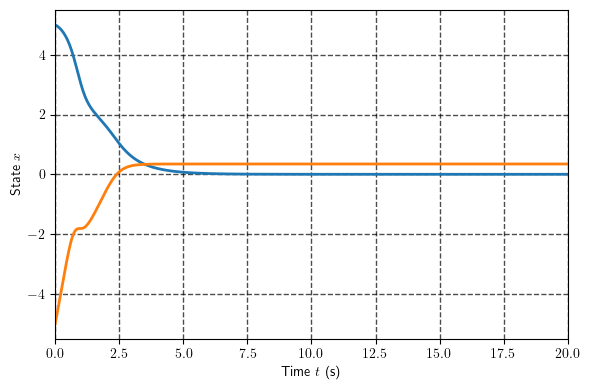

In [10]:
x_sol = simulate(adaptive_error_dynamics, [[5, -5]], tf=20, show_plot=True)

### **Stability Analysis and Barbalat's Lemma**  

Since the system above is not autonomous one can mot use Lyapunov theory just out of the box. 

However, let us still try to conclude something on trajectories with using Lyapunov like candidate:
$$
V = \frac{1}{2}\tilde{x}^2 + \frac{1}{2}\gamma\tilde{p}
$$


### **Barbalat's Lemma**

If $V(t)$ has a finite limit as $t\to \infty$ and if $\dot{V}(t)$ is uniformly continuous (or $\ddot{V}(t)$ is bounded), then $\dot{V}(t)\to 0$ as $t\to \infty$


The derivative of $V$:
$$
\dot{V} = \tilde{x}\dot{\tilde{x}} + \gamma\tilde{p}\dot{\tilde{p}} =  -k\tilde{x}^2 
$$

This says that $V(t)\leq V(0)$ by first two conditions and hence $\tilde{x}$ and $\tilde{p}$ are bounded. 

But it does not say anything about the convergence of $\tilde{x},\tilde{p}$ to zero. Moreover, the invariant set theorem cannot be applied, because the dynamics is non-autonomous.

Let us find the second derivative:
$$
    \ddot{V} = 2\tilde{x}\dot{x} = 2\tilde{x}(- \phi(\tilde{x}, t) \tilde{p} - k\tilde{x})
$$
This is bounded because $\tilde{x},\tilde{p},\phi$ are bounded. 

This implies $\dot {V}\to 0$ as $t \to \infty $ and hence $\tilde{x}\to0$. This proves that the error converges.

### **Adaptive Control with Sliding Surfaces**

Suppose now that we wish to track the  desired trajectory for $n$-th order system given by with error is given by:
$$
\tilde{y} = y_d - y
$$
And the whole state **tracking error vector** is given by:
$$
\tilde{\mathbf{x}} = \mathbf{x}_d - \mathbf{x} = [\tilde{y},\dot{\tilde{y}}, \ddot{\tilde{y}}, \dots, \tilde{y}^{n-1}]^T
$$

The goal is to find control law such that $\tilde{y}\rightarrow 0 $ as $t\rightarrow \infty$

Can we use the idea of sliding surface that we develope with robust sliding mode design to ensure the convergence to the sliding surface, but instead of robustness to uncertainty propose the adaptation law?



Namely if we define sliding surface as:

$$
s(y, t) = \Big(\frac{d}{dt} + \lambda\Big)^{n-1}\tilde{y}
$$

And now we look for controller and adaptation law in form:

$$
    u(\hat{\mathbf{p}}, \tilde{y}, \dot{\tilde{y}}, \dots \tilde{y}^{(n-1)}), \quad \dot{\mathbf{\hat{p}}}(\tilde{y}, \dot{\tilde{y}}, \dots \tilde{y}^{(n-1)})
$$
such that $s \rightarrow 0$ which is in turn implies convergence of tracking error.

Let us start with second order systems (as we have stated before the many scalar mechanical systems are easily represented as second order). 

We consider specific class of systems that can be written as follows: 
$$
d\ddot{y} = f(y, \dot{y}) + \boldsymbol{\phi}(y, \dot{y})\mathbf{p} +  h(y, \dot{y})u
$$

where $d$ and $\mathbf{p}$ are unknown constant and vector of parameters, and $f, h$ are known functions, with latter being always invertible.  

Let us choose the sliding surface as:
$$
    s = \dot{\tilde{y}} + \lambda \tilde{y}
$$

And consider the following Lyapunov candidate:
$$
    V = 
    \frac{1}{2} ds^2 + 
    \frac{1}{2}\gamma\tilde{\mathbf{p}}^T\tilde{\mathbf{p}} + 
    \frac{1}{2}\gamma\tilde{d}^2
$$

The time derivative of the candidate is given by:
$$
\dot{V} = sd\dot{s} + \gamma \tilde{\mathbf{p}}^T\dot{\tilde{\mathbf{p}}} + \gamma \tilde{d}\dot{\tilde{d}}
$$

Substitution of sliding surface yields:
$$
\dot{V} = s\big(d\ddot{y}_d + d\lambda \dot{\tilde{y}} - f(y, \dot{y}) - \boldsymbol{\phi}(y, \dot{y})\mathbf{p} -h(y, \dot{y})u\big) + \gamma \tilde{\mathbf{p}}^T\dot{\tilde{\mathbf{p}}} + \gamma \tilde{d}\dot{\tilde{d}}
$$



Let us define the controller as follows:

$$
    u = h^{-1}(y, \dot{y})\big(\hat{d}(\ddot{y}_d+\lambda\dot{\tilde{y}})-f(y, \dot{y}) - \boldsymbol{\phi}(y, \dot{y})\hat{\mathbf{p}}+ ks)
$$

Then the derivative of Lyapunov candidate become:

$$
\dot{V} = -ks^2 + s\big(-\tilde{d}(\ddot{y}_d + \lambda \dot{\tilde{y}} ) + \boldsymbol{\phi}(y, \dot{y})\tilde{\mathbf{p}}\big) + \gamma \tilde{\mathbf{p}}^T\dot{\tilde{\mathbf{p}}} + \gamma \tilde{d}\dot{\tilde{d}}
$$

After rearranging terms:
$$
\dot{V} = -ks^2 + 
\tilde{d}\big(-(\ddot{y}_d + \lambda \dot{\tilde{y}} )s + 
\gamma\dot{\tilde{d})} +\tilde{\mathbf{p}}^T(\boldsymbol{\phi}^T(y, \dot{y})s + \dot{\tilde{\mathbf{p}}})
$$


Now it is pretty straight forward to design adaptation laws:

$$
\dot{\mathbf{\hat{p}}} =  -\frac{1}{\gamma}\boldsymbol{\phi}^T(\mathbf{x}) s, \quad \dot{\hat{d}} = \frac{1}{\gamma}(\ddot{y}_d + \lambda \dot{\tilde{y}} )s 
$$

As example let us consider a the same simplified model of the motion of an underwater vehicle that have controlled with robust controller:

$$
m\ddot{y} + b\dot{y}|\dot{y}| + c g = u 
$$

$m$ is the mass of the vehicle (including the so-called added-mass, associated with motion in a fluid), $b$ is a
drag coefficient and $c$ is combined effect of buoyancy and gravity. 

In practice, $m$, $b$, and $c$ are not known accurately, because they only describe
loosely the complex hydrodynamic effects that govern the vehicle's motion.

In [11]:
m = 1.5
b = 1.9
c = 5.2
g = 9.81

def dynamics(state, u):
    y = state[0]
    dy = state[1]
    ddy = (-b*dy * abs(dy) - c*g + u)/m
    return dy, ddy

We consider the tracking of harmonic trajectory $y_d = \cos(t)$:

In [12]:
def trajectory(t):
    y_d = np.cos(t) 
    dy_d = -np.sin(t)
    ddy_d = np.cos(t)
    return y_d, dy_d, ddy_d


Now we will implement the controller and adaptation laws:

In [13]:
# define regressor 
def phi(x):
    y = x[0]
    dy = x[1]
    return np.array([-dy * abs(dy), -g])

# define known f
def f(x):
    return 0

# define known h
def h(x):
    return 1


Lets define the controller:

In [14]:
L = 10
k = 1

gamma = 0.5

def control(x, desired, p_hat, d_hat):
    y = x[0]
    dy = x[1]
    # parse the desired trajectory 
    y_d, dy_d, ddy_d = desired

    # define sliding surface and reference
    y_e = y_d - y 
    dy_e = dy_d - dy
    s = dy_e + L*y_e
    ds_r = ddy_d + L*dy_e

    # controller 
    u = (d_hat*ds_r - f(x) - phi(x)@p_hat + k*s)/h(x)

    # adaptation laws
    dp_hat = -phi(x).T*s/gamma
    dd_hat = ds_r*s/gamma

    return u, dp_hat, dd_hat

And simulate closed loop dynamics:

In [15]:

# note that we include the parameter estimates in to state in order to integrate
def closed_loop_dynamics(state, t):
    x, p_hat, d_hat = state[:2], state[2:-1], state[-1]

    desired = trajectory(t)
    u, dp_hat, dd_hat = control(x, desired, p_hat, d_hat)

    dx = dynamics(state, u)

    return np.concatenate((dx, dp_hat, [dd_hat]))


tf = 15
x_sol = simulate(closed_loop_dynamics, [[0, 0, 0, 0., 0]], tf=tf, N = 1000, show_plot=False)

y = x_sol[0][:,0]
dy = x_sol[0][:,1]
p_hat = x_sol[0][:,2:]
t= np.linspace(0, tf, len(y))              
y_d, dy_d, ddy_d = trajectory(t)

<Figure size 600x400 with 0 Axes>

The controller was able to perfectly track reference signal:

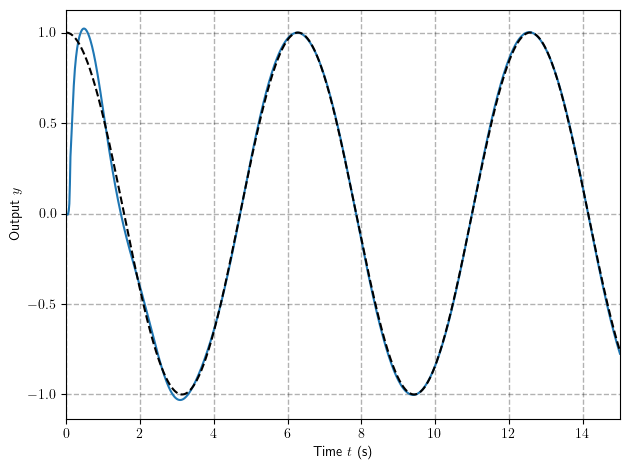

In [16]:

plot(t, y)    
plot(t, y_d,color = 'black', linestyle='--' )
xlim([t[0],t[-1]])
ylabel(r'Output $y$')    
xlabel(r'Time $t$ (s)')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()



### **Sliding Surface Adaptive Control for $n$-th Order System:**

It is not hard to show (using same Lyapunov candidate) that if one consider the $n$-dimensional system:
$$
d y^{(n)}= f(\mathbf{x}) + 
\boldsymbol{\phi}(\mathbf{x})\mathbf{p} + h(\mathbf{x})u
$$

With sliding surface:
$$
s = \Big(\frac{d}{dt} + \lambda\Big)^{n-1}\tilde{y}
$$

The following controller:
$$
    u = h^{-1}(\mathbf{x})\big(\hat{d}\dot{s}_r  -f(\mathbf{x}) - \boldsymbol{\phi}(\mathbf{x})\hat{\mathbf{p}} + k s\big)
$$
where $\dot{s}_r$ is the reference sliding surface derivative:
$$
\dot{s}_r= \Big(\Big(\frac{d}{dt} + \lambda\Big)^{n-1}- \Big(\frac{d}{dt} \Big)^{n-1}\Big )\dot{\tilde{y}} +  y_d^{(n)}
$$

with adaptation laws:
$$
\dot{\mathbf{\hat{p}}} =  -\frac{1}{\gamma}\boldsymbol{\phi}^T(\mathbf{x}) s, \quad
\dot{\hat{d}} = \frac{1}{\gamma}\dot{s}_r s 
$$


The time derivative $\dot{V}$ is n.s.d thus yielding convergence to $s$ and boundedness of $\hat{\mathbf{p}}$

### **Parameter Drift**

When the signal $\boldsymbol{\phi}$ is persistently exciting, both simulations and analysis
indicate that the adaptive control systems have some robustness with respect to non-
parametric uncertainties. 

However, when the signals are not persistently exciting,
even small uncertainties may lead to severe problems for adaptive controllers. The
following example illustrates this situation.



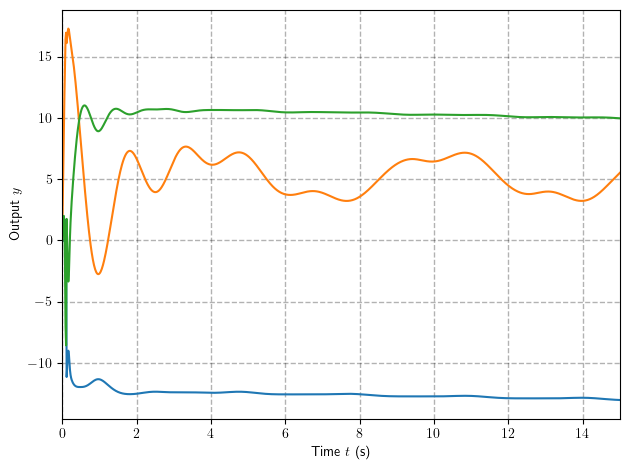

In [17]:
plot(t, p_hat)    
xlim([t[0],t[-1]])
ylabel(r'Output $y$')    
xlabel(r'Time $t$ (s)')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()



In general, the following points can be made about parameter drift
* Parameter drift occurs when the signals are not persistently exciting
* it is mainly caused by measurement noise and integration errors 
* Does not affect tracking accuracy until instability occurs
* Leads to sudden failure of the adaptive control system (by exciting unmodeled dynamics)

Parameter drift is a major problem associated with non-parametric uncertainties
(noise and disturbance). But there are possibly other problems. For example, when
the adaptation gain or the reference signal are very large, adaptation becomes fast and
the estimated parameters may be quite oscillatory. If the oscillations get into the
frequency range of unmodeled dynamics, the unmodeled dynamics may be excited
and the parameter adaptation may be based on meaningless signals, possibly leading
to instability of the control system.

### **Dead-Zone**

Even though the possibility of small disturbances leading to instability is quite
undesirable, it does not mean that adaptive control is impractical. A number of
techniques for modifying the adaptation law are available to avoid the parameter drift
problem. The simplest is called the "dead-zone" technique. Because of its simplicity
and effectiveness, it is most frequently used.

The dead-zone technique is based on the observation that small tracking errors
contain mostly noise and disturbance, therefore, one should shut the adaptation
mechanism off for small tracking errors. 

Specifically, we should replace an adaptation law with something like:
$$
\dot{\mathbf{\hat{p}}} =  
\begin{cases}
-\frac{1}{\gamma}\boldsymbol{\phi}^T(\mathbf{x}) s, \quad |s|\geq \epsilon\\ 
0, \quad |s| < \epsilon
\end{cases}
$$

Let us add the dead-zone to the controller:

In [18]:
def control(x, desired, p_hat, d_hat):
    y = x[0]
    dy = x[1]
    # parse the desired trajectory 
    y_d, dy_d, ddy_d = desired
    # y_d, dy_d, ddy_d = 2, 0, 0

    # define sliding surface and reference
    y_e = y_d - y 
    dy_e = dy_d - dy
    s = dy_e + L*y_e
    ds_r = ddy_d + L*dy_e

    # controller 
    u = (d_hat*ds_r - f(x) - phi(x)@p_hat + k*s)/h(x)

    # adaptation laws
    if abs(y_e)>=0.05:
        dp_hat = -phi(x).T*s/gamma
        dd_hat = ds_r*s/gamma
    else:
        dp_hat = 0*phi(x).T
        dd_hat = 0 
    return u, dp_hat, dd_hat

And checkout the adaptation:

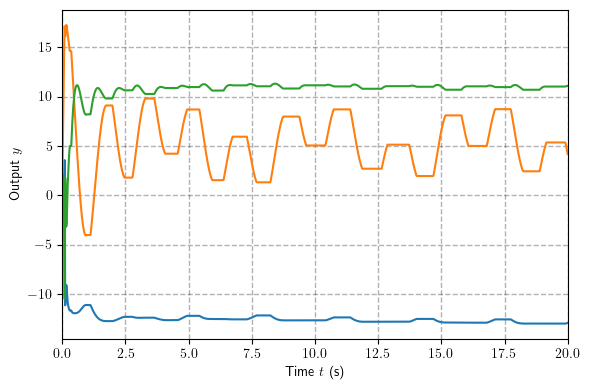

In [19]:
tf = 20
x_sol = simulate(closed_loop_dynamics, [[0, 0, 0, 0., 0]], tf=tf, N = 1000, show_plot=False)
y = x_sol[0][:,0]
dy = x_sol[0][:,1]
p_hat = x_sol[0][:,2:]
t= np.linspace(0, tf, len(y))              
y_d, dy_d, ddy_d = trajectory(t)

plot(t, p_hat)    
xlim([t[0],t[-1]])
ylabel(r'Output $y$')    
xlabel(r'Time $t$ (s)')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()


As well as the tracking capability:

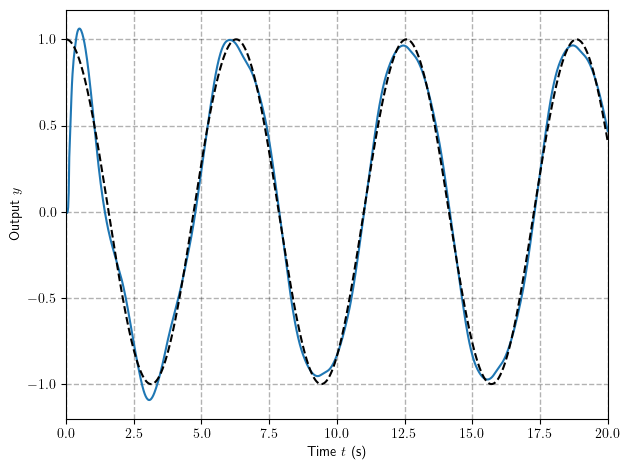

In [20]:
plot(t, y)    
plot(t, y_d,color = 'black', linestyle='--' )
xlim([t[0],t[-1]])
ylabel(r'Output $y$')    
xlabel(r'Time $t$ (s)')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()

### **Conclusion**

I hope that this course gave you some ideas on control theory and it's application to robotics as well as some motivation to continue your studies in this field. 

The field of control is rapidly evolving incorporating more and more new domains including optimization, data science and machine learning. 

I would be happy if that this course can serve as a foundation that will help you to be more confident in your future robotics challenges!

### **What next?**

There are numerious topics that we have not covered here but which are very practical and interesting, among many others:

* Linearization and Gain Scheduling 
* Lyapunov Tools for Nonautonomous Systems
* Another stability concepts (Zhukovskiy Stability, Contraction theory, Passivity)
* Observers and Output feedback 
* Motion Planning and Differential flatness 
* Numerical methods in anslysis and design 
* Data driven control and system identification
* Convex Optimization in Control, Model Predictive Control, Linear Matrix Inequalities, Sum of Squares


I personally recommend outstanding courses on [data driven control](https://www.youtube.com/playlist?list=PLMrJAkhIeNNQkv98vuPjO2X2qJO_UPeWR), [underacted robotics](https://underactuated.mit.edu/) and [video course based on the text book from Slotine](https://www.bilibili.com/video/BV1yb411e7t5/) itself